# <font color='green' >-</font>


### <font color='blue'>-Ramsés Felipe de Oliveira-</font>


O sistema de recomendador “Re Comenta!” foi executado para um conjunto de dados da empresa VemComprar. A execução calculou um conjunto de 40 produtos recomendados para cada cliente. O sistema usou dois modelos de recomendação: 
popular - calculado pela frequencia de produtos mais comprados pelos clientes.
UBCF (user based collaborative filter) - identifica perfis de clientes que consumiram produtos similares. Indica produtos para um cliente que ele ainda não adquiriu mas que foram adquiridos por outros clientes com mesmo perfil. 

Entretanto, o Sr. Tomé, gerente de vendas, deseja uma demonstração de que os produtos indicados são válidos para os clientes para os quais foram recomendados. Como podemos convencer o Sr. Tomé de que as recomendações calculadas pelo sistema são adequadas?

Considere o seguinte conjunto de dados:

vendas.csv - produtos vendidos por cliente em um período
recomenda_ubcf.csv - dados gerados pelo recomendador no modelo filtro colaborativo
recomenda_popular.csv - dados gerados pelo recomendador no modelo produto popular


    

#### Carregando alguns dos pacotes que serão utilizados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
sea.set(color_codes=True)
import operator
import warnings

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import operator
import warnings
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
warnings.filterwarnings("ignore")

# Any results you write to the current directory are saved as output.

In [4]:
data = pd.read_csv('vendas.csv')
data.head()

,cliente,produto,quantidade
0,b'QRQcRA',b'kcLG7w',2
1,b'S84tyg',b'gReWUA',2
2,b'S84tyg',b'QSo4gg',2
3,b'S84tyg',b'd3Q9zg',2
4,b'RPEZ6A',b'isUtKA',2


In [5]:
data.shape

(132102, 3)

In [6]:
produto=data['produto'].value_counts()
print("Total Resultados : {}".format(data.shape[0]))
print("Total Produtos : {}".format(len(produto)))

Total Resultados : 132102
Total Produtos : 9267


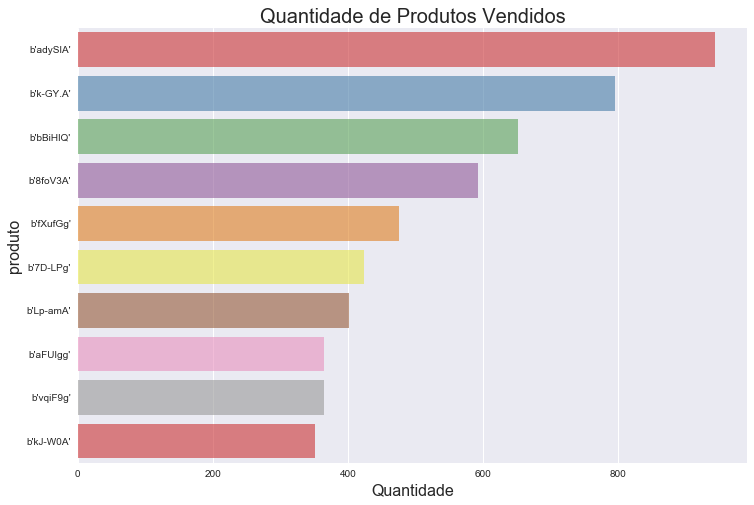

In [9]:
produto=data['produto'].value_counts().head(10)
plt.figure(figsize=(12,8))
sea.barplot(y=produto.index, x=produto.values,palette='Set1', alpha=.60)
plt.title("Quantidade de Produtos Vendidos", fontsize=20)
plt.xlabel("Quantidade", fontsize=16)
plt.ylabel("produto", fontsize=16)
plt.show();

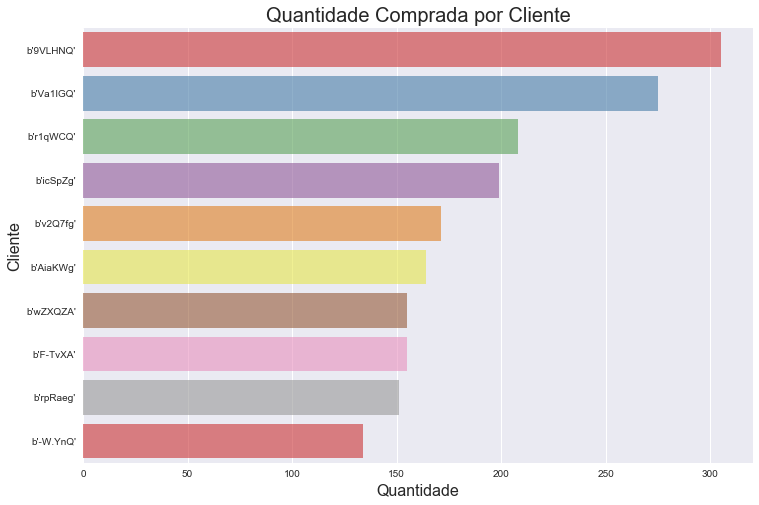

In [10]:
cliente=data['cliente'].value_counts().head(10)
plt.figure(figsize=(12,8))
sea.barplot(y=cliente.index, x=cliente.values,palette='Set1', alpha=.60)
plt.title("Quantidade Comprada por Cliente", fontsize=20)
plt.xlabel("Quantidade", fontsize=16)
plt.ylabel("Cliente", fontsize=16)
plt.show();

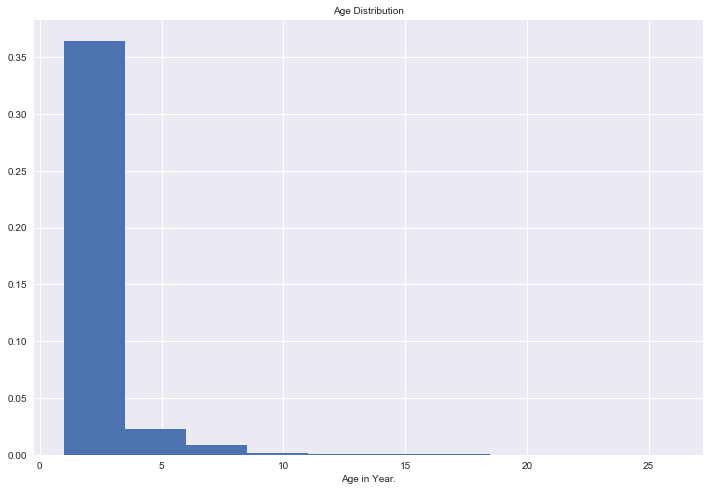

In [27]:
plt.figure(figsize=(12,8))
quantidade=data.quantidade[data.quantidade>0]
plt.hist(quantidade,bins=10,normed=True)
plt.title('Age Distribution',size=10)
plt.xlabel('Age in Year.',size=10)
plt.show()

In [28]:
#Produto mais popular
df_produto_popular = data.groupby('produto')['quantidade'].sum().sort_values(ascending=False).reset_index()

In [30]:
df_produto_popular.head()

,produto,quantidade
0,b'adySIA',2023
1,b'k-GY.A',1871
2,b'bBiHIQ',1697
3,b'8foV3A',1337
4,b'fXufGg',1178


#### Vale ressaltar que poderiamos apenas termos separado os primeiros 40

In [63]:
class PopularityRecommender(object):
    
    PRODUTO_NAME = 'Popularity'
    
    def __init__(self, df_popularity):
        self.df_popularity = df_popularity
        
    def get_model_name(self):
        return self.PRODUTO_NAME
        
    def recommend_produtos(self, produtos_to_ignore=[], produtos_to_rec=[], topn=40):
       
        if len(produtos_to_rec) == 0:
            df_recommendations = self.df_popularity[~self.df_popularity['produto'].isin(produtos_to_ignore)] \
                                 .sort_values('quantidade', ascending = False) \
                                 .head(topn)
        else:
            df_recommendations = self.df_popularity[self.df_popularity['produto'].isin(produtos_to_rec)] \
                                 .sort_values('quantidade', ascending = False) \
                                 .head(topn)

        return df_recommendations

In [68]:
ramses = ['ramses']
ramses = pd.DataFrame(ramses)
ramses.columns = ["nome"]
ramses['produto'] = ['']
ramses

,nome,produto
0,ramses,


In [133]:
clientes = data.cliente
clientes = pd.DataFrame(sorted(set(clientes)))
print(clientes.shape)
clientes.columns = ["nome"]
clientes.head()

(23250, 1)


,nome
0,b'--30cQ'
1,b'--6xEQ'
2,b'--GGSg'
3,b'--XYSQ'
4,b'--tTyQ'


In [134]:
popularity_model = PopularityRecommender(df_produto_popular)
pop_recommand = popularity_model.recommend_produtos()
#pop_recommand = pop_recommand.merge(ramses, how = 'left', on = 'produto')\
#                [['nome', 'produto']]

nome = []
produtos_recomendados = []
tabela = [nome, produtos_recomendados]
for i in clientes.nome:
    
    for j in pop_recommand.produto:
        nome.append(i)
        produtos_recomendados.append(j)


#pop_recommand

In [135]:
tabela = pd.DataFrame(tabela)
tabela = tabela.transpose()
tabela.columns = ["cliente",'produto_recomendado']
tabela.head()

,cliente,produto_recomendado
0,b'--30cQ',b'adySIA'
1,b'--30cQ',b'k-GY.A'
2,b'--30cQ',b'bBiHIQ'
3,b'--30cQ',b'8foV3A'
4,b'--30cQ',b'fXufGg'


In [136]:
tabela.shape

(930000, 2)

In [137]:
tabela.head(40)

,cliente,produto_recomendado
0,b'--30cQ',b'adySIA'
1,b'--30cQ',b'k-GY.A'
2,b'--30cQ',b'bBiHIQ'
3,b'--30cQ',b'8foV3A'
4,b'--30cQ',b'fXufGg'
5,b'--30cQ',b'kJ-W0A'
6,b'--30cQ',b'7D-LPg'
7,b'--30cQ',b'WtDulg'
8,b'--30cQ',b'vqiF9g'
9,b'--30cQ',b'Lp-amA'


In [138]:
tabela.to_csv('produtos_recomendados_por_poluridade', sep='\t', encoding='utf-8')

 # --------------

In [139]:
data.columns

Index(['cliente', 'produto', 'quantidade'], dtype='object')

In [141]:
# Creating a sparse pivot table with donors in rows and projects in columns
df_clientes_produtos = data.reset_index().pivot(index='cliente', columns='produto', values='quantidade').fillna(0)

In [142]:
df_clientes_produtos.shape

(23250, 9267)

In [143]:
df_clientes_produtos.head()

produto,b'--3dAA',b'--OZ9Q',b'-.QmUA',b'-.RMPg',b'-.hhMQ',b'-.lBJQ',b'-045AA',b'-08a4A',b'-0BmgA',b'-0bfvQ',...,b'zy7shA',b'zy9APg',b'zyBmlA',b'zyPOCg',b'zynWsA',b'zyrzVA',b'zz9uUA',b'zzDwhg',b'zzTUZg',b'zzyCJA'
cliente,,,,,,,,,,,,,,,,,,,,,
b'--30cQ',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b'--6xEQ',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b'--GGSg',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b'--XYSQ',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b'--tTyQ',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
# Transform the donor-project dataframe into a matrix
df_clientes_produtos_matrix = df_clientes_produtos.values

# Get donor ids
clientes_ids = df_clientes_produtos.index.tolist()

# Print the first 5 rows of the donor-project matrix
df_clientes_produtos_matrix[:5]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [146]:
from scipy.sparse.linalg import svds


In [148]:
# Performs matrix factorization of the original donor-project matrix
# Here we set k = 20, which is the number of factors we are going to get
# In the definition of SVD, an original matrix A is approxmated as a product A ≈ UΣV 
# where U and V have orthonormal columns, and Σ is non-negative diagonal.
U, sigma, Vt = svds(df_clientes_produtos_matrix, k = 20)
sigma = np.diag(sigma)

# Reconstruct the matrix by multiplying its factors
all_clientes_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

#Converting the reconstructed matrix back to a Pandas dataframe
df_cf_preds = pd.DataFrame(all_clientes_predicted_ratings, 
                           columns = df_clientes_produtos.columns, 
                           index=clientes_ids).transpose()
df_cf_preds.head()

,b'--30cQ',b'--6xEQ',b'--GGSg',b'--XYSQ',b'--tTyQ',b'-.3aUQ',b'-.61yA',b'-.8slQ',b'-.Rjcg',b'-.abjA',...,b'zz-7Tw',b'zz1VeQ',b'zzGMXQ',b'zzQTDA',b'zzUiSw',b'zzY4bA',b'zza1YA',b'zzc1bA',b'zzi6cA',b'zzuI2g'
produto,,,,,,,,,,,,,,,,,,,,,
b'--3dAA',-0.002828,0.020774,-4.336854e-04,0.015000,0.125061,3.861651e-03,-0.011816,-2.104027e-04,-0.000516,-0.000658,...,-0.006185,0.002428,-0.000690,0.007130,-0.000475,-0.003357,-1.349278e-03,0.045601,9.399080e-05,-0.001620
b'--OZ9Q',0.000003,-0.000019,4.020933e-07,0.000019,-0.000040,-5.399354e-07,0.000080,9.857446e-07,-0.000002,0.000049,...,0.000120,0.000044,0.000002,0.000006,0.000004,0.000015,-1.596988e-08,0.000217,3.161689e-08,-0.000002
b'-.QmUA',0.000149,0.000624,8.835971e-05,0.002927,-0.000548,-2.430474e-04,0.002686,1.950778e-05,0.000082,0.000434,...,0.002841,0.000060,0.000142,0.015693,0.000079,0.000870,1.406427e-04,0.002291,1.098031e-04,0.000078
b'-.RMPg',0.000027,-0.000048,6.284681e-06,-0.000091,-0.000112,6.410340e-06,0.000259,2.478105e-06,0.000021,0.000055,...,0.000177,0.000007,0.000011,-0.000117,0.000006,0.000029,1.849686e-05,0.000516,3.719063e-05,0.000002
b'-.hhMQ',0.000051,-0.000140,6.874307e-06,-0.000035,0.000116,4.359096e-05,0.000659,3.771510e-06,0.000075,0.000191,...,0.000650,0.000095,0.000014,0.000304,0.000034,0.000171,7.445132e-06,-0.000524,-6.796010e-05,0.000036


In [159]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, popularity_model, df_cf_predictions):
        self.popularity_model = popularity_model
        self.df_cf_predictions = df_cf_predictions
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_projects(self, donor_id, projects_to_ignore=[], projects_to_rec=[], topn=40):
        if donor_id in df_cf_preds.columns:
            # Get and sort the donor's predictions
            donor_predictions = self.df_cf_predictions[donor_id].reset_index().rename(columns={donor_id: 'quantidade'})

            if len(projects_to_rec) == 0:
                # Recommend the highest predicted projects that the donor hasn't donated to
                df_recommendations = donor_predictions[~donor_predictions['produto'].isin(projects_to_ignore)] \
                                     .sort_values('quantidade', ascending = False) \
                                     .head(topn)
            else:
                df_recommendations = donor_predictions[donor_predictions['produto'].isin(projects_to_rec)] \
                                     .sort_values('quantidade', ascending = False) \
                                     .head(topn)                
        else:
            df_recommendations = self.popularity_model.recommend_projects(projects_to_ignore, projects_to_rec, topn)
            
        return df_recommendations

In [160]:
cfr_model = CFRecommender(popularity_model, df_cf_preds)

In [163]:
donor_id = "b'QRQcRA'"

In [166]:
cfr_recommend = cfr_model.recommend_projects("b'..0ycg'")
#cfr_recommend = cfr_recommend.merge(df_projects, how = 'left', on = 'Project ID')\
#                [['rec_strength', 'Project ID', 'Project Title', 'Project Essay']]
cfr_recommend

,produto,quantidade
565,b'1qSpIA',0.079856
7262,b'luCVzA',0.074911
8883,b'x4p4HQ',0.074568
6269,b'f787aA',0.071215
521,b'1UthOg',0.069326
4165,b'QNBpwg',0.069207
5268,b'Y4Tfsw',0.061997
3574,b'MLDHUg',0.055174
7368,b'mbazPA',0.051934
2565,b'FmO0YA',0.051119


In [180]:

nome2 = []
produtos2_recomendados = []
tabela2 = [nome2, produtos2_recomendados]
for i in clientes.nome:
    cfr_recommend = cfr_model.recommend_projects(i)
    for j in cfr_recommend.produto:
        nome2.append(i)
        produtos2_recomendados.append(j)


#pop_recommand

In [181]:
tabela2 = pd.DataFrame(tabela2)
tabela2 = tabela2.transpose()
tabela2.columns = ["cliente",'produto_recomendado']
tabela.head()

,cliente,produto_recomendado
0,b'--30cQ',b'adySIA'
1,b'--30cQ',b'k-GY.A'
2,b'--30cQ',b'bBiHIQ'
3,b'--30cQ',b'8foV3A'
4,b'--30cQ',b'fXufGg'


In [182]:
tabela2.shape

(930000, 2)

In [183]:
tabela2.to_csv('produtos_recomendados_por_similaridade', sep='\t', encoding='utf-8')